## Supervised Learning: Regression


Last week Review
1. Numpy
2. Pandas
3. Supervised Learning using Sklearn
4. Case Study with Twitter dataset

This week
1. Supervised learning (Regression)
2. Unsupervised learning using R


<img src="images/week2.png" height="70%" width="70%" align="left">


**Be sure to install R studio**

Recall the difference between Classifaction and Regression


<img src="images/classification_vs_regression.png" height="70%" width="70%" align="left">

Introduction to linear regression

Linear regression tries to model the relationship between two variables: 
    - an dependent variable (y)
    - one or more independent variables (x)
    
 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_regression(dataset, x_var,y_var):
    data = sns.load_dataset(dataset)
    print(data.head(3))
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[y_var],data[x_var])
    fig = sns.regplot(y=y_var, x =x_var,data=data, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    fig.legend()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


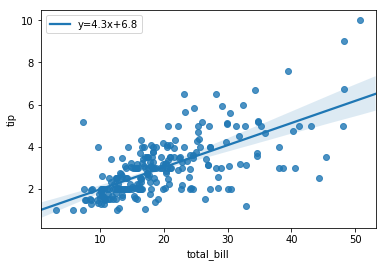

In [2]:
plot_regression("tips","total_bill", "tip")

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31


C:\Users\InnCreator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\InnCreator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\InnCreator\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


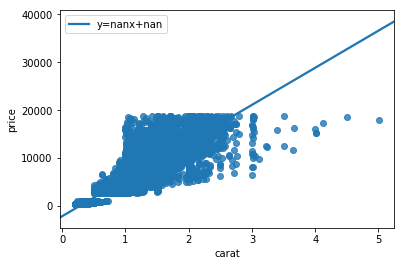

In [3]:
plot_regression("diamonds","carat", "price")

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  


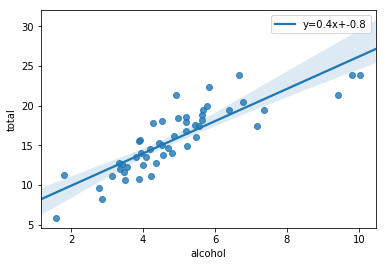

In [4]:
plot_regression("car_crashes","alcohol", "total")

In [5]:
#try the insuarance and pemiums obtained.

### Evaluation

**Mean Squared Error**

<img src="images/mse.jpg" height="30%" width="30%" align="left">

In [6]:
from sklearn.metrics import mean_squared_error

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

mse([1, 2, 3, 4],
    [2, 0, 3, 5])

1.5

In [7]:
mse([3, -0.5, 2, 7],
    [2.5, 0.0, 2, 8])

0.375

**Mean Absolute Error**

<img src="images/mae.png" height="30%" width="30%" align="left">

In [8]:
from sklearn.metrics import mean_absolute_error

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae([1, 2, 3, 4],
    [2, 0, 3, 5])

1.0

In [9]:
mae([3, -0.5, 2, 7],
    [2.5, 0.0, 2, 8])

0.5

**R2 score (R2 The coffiecient of determination)**

R2 score is a measure of explained variation to total variation
* An R2 score of 0 means that  Y cannot be predicted from X.
* An R2 score of 1 means Y variable can be predicted without error from X.
* An R2 score between 0 and 1 indicates the extent to which the Y is predictable. An R2 score of 0.10 means that 10 percent of the variance in Y is predictable from X; an R2 of 0.20 means that 20 percent is predictable; and so on.

    - If Coefficient of Determination R2 score is close to 1 then the model fits the data well
    - If Coefficient of Determination R2 score is close to 0 then the model does not fit the data well (obviously)



R2 = { ( 1 / N ) * Σ [ (xi - x) * (yi - y) ] / (σx * σy ) }2



<img src="images/r2.jpg" height="30%" width="30%" align="left">

<img src="images/r2_.png" height="50%" width="50%" align="left">

In [10]:
from sklearn.metrics import r2_score
def r2score(y_true, y_pred):
    return r2_score(y_true, y_pred) 

r2score([0, 1, 2],
        [0, 1, 2])

1.0

In [11]:
r2score([0, 1, 2],
        [0, 3, 2])

-1.0

In [12]:
r2score([0, 1, 2],
        [0.2, 0.8, 2.4])

0.88

### Example

In [3]:


#Importation
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes #import the dataset loader

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


diabetes = load_diabetes() #load the dataset

Prepare the dataset

In [14]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
boston.DESCR.splitlines()

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [17]:
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
df['Home_Value'] = boston.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Home_Value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


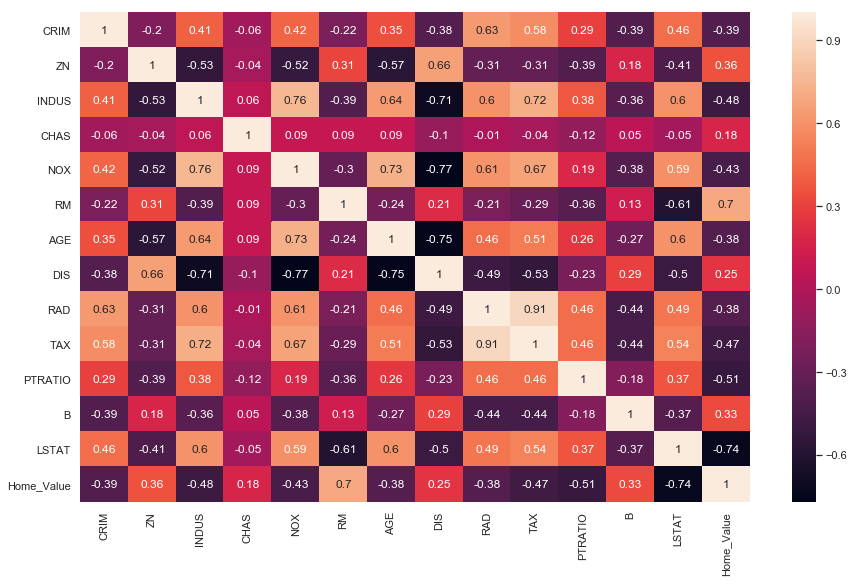

In [19]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(data=correlation_matrix, annot=True)

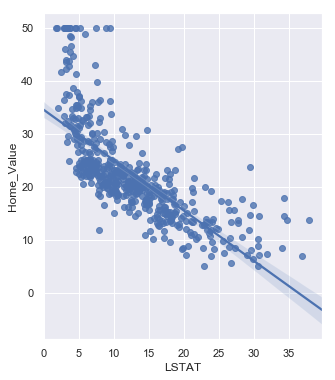

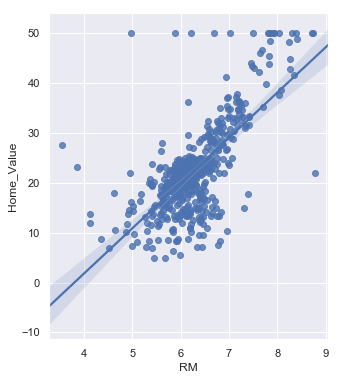

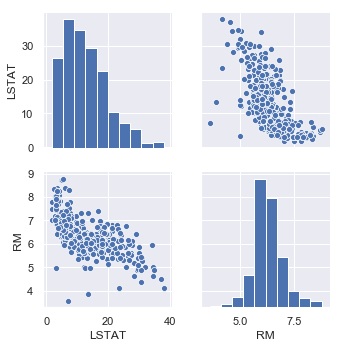

In [20]:

def visualize(selected_features):
        for var in selected_features:
            f, ax = plt.subplots(figsize=(5, 6))
            sns.regplot(x=var, y="Home_Value", data=df, ax=ax);
        sns.pairplot(df, vars=selected_features)
    
visualize(['LSTAT','RM'])

In [21]:
def model(selected_features):
    #defining parameters to be used in training
    X = df[selected_features]
    y = df['Home_Value']
#y = pd.DataFrame(data=boston.target)
#defining the model
    clf = linear_model.LinearRegression()
    #splitting data
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=7)
    clf.fit(x_train,y_train)
    #predicting the data
    y_pred = clf.predict(x_test)
    #Scoring and testing the data
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rscore = r2_score(y_test, y_pred)
    #return the data in a dictionary
    dictionary = {"y_pred":y_pred,"mae":mae,"mse":mse,"rscore":rscore,"intercept":clf.intercept_,"coef":clf.coef_, "y_test":y_test,}
    return dictionary

In [27]:
#Modelling the data
model1 = model(['RM'])
model2 = model(['LSTAT','RM'])
model3 = model(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','RAD','DIS','TAX','PTRATIO','B','LSTAT'])

evaluations = pd.DataFrame({'Model_1':  [ model1['mae'],  model1['mse'],model1['rscore'], model1['intercept']],
                        'Model_2': [ model2['mae'],  model2['mse'],model2['rscore'], model2['intercept']],
                        'Model_3': [ model3['mae'],  model3['mse'],model3['rscore'], model3['intercept']],
                       },
                          index = pd.Index(['MAE','MSE',"R-Score","Intercept"]))

print("\n",evaluations.head())
#predictions and true values
results = pd.DataFrame({'Actual':list(model1['y_test']) , 
                        'Model_1_prediction':  model1['y_pred'].flatten(),
                        'Model_2 _prediction':  model2['y_pred'].flatten(),
                        'Model_3 _prediction':  model3['y_pred'].flatten()
                       })
print("\n",results.head(10))




              Model_1    Model_2    Model_3
MAE         4.631796   3.953071   3.307638
MSE        55.899399  34.833169  25.767879
R-Score     0.242556   0.528006   0.650842
Intercept -38.285942  -9.339942  23.562137

    Actual  Model_1_prediction  Model_2 _prediction  Model_3 _prediction
0    21.7           23.882084            23.226199            23.131416
1    18.5           19.021409            21.581001            19.042361
2    22.2           20.849023            21.547164            19.906675
3    20.4           19.546362            23.155455            19.133631
4     8.8           19.624133            16.546349             5.639872
5     8.3           13.713553            13.228384            12.365129
6    21.4           22.268340            22.281479            21.545826
7    23.6           24.086232            25.635473            28.781141
8    23.5           22.861342            27.207250            29.074896
9    19.0           19.575526            18.384715           